In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

website_traffic = pd.read_csv('website_traffic.csv')
website_traffic

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [2]:
website_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [3]:
website_traffic.drop(['Traffic Source'], axis=1, inplace=True) #axis = 1 , dropping a column (not a row).
website_traffic

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,3.890460,3,1.0
1,4,3.429316,0.391001,8.478174,0,1.0
2,4,1.621052,0.397986,9.636170,2,1.0
3,5,3.629279,0.180458,2.071925,3,1.0
4,5,4.235843,0.291541,1.960654,5,1.0
...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0
1996,3,0.392856,0.095559,3.824416,1,1.0
1997,4,9.899823,0.446622,1.288675,1,1.0
1998,3,0.393319,0.278340,5.037584,2,1.0


In [4]:
website_traffic.corr(numeric_only=True)['Conversion Rate'] # only numeric
website_traffic

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,3.890460,3,1.0
1,4,3.429316,0.391001,8.478174,0,1.0
2,4,1.621052,0.397986,9.636170,2,1.0
3,5,3.629279,0.180458,2.071925,3,1.0
4,5,4.235843,0.291541,1.960654,5,1.0
...,...,...,...,...,...,...
1995,1,2.724513,0.207187,1.324206,2,1.0
1996,3,0.392856,0.095559,3.824416,1,1.0
1997,4,9.899823,0.446622,1.288675,1,1.0
1998,3,0.393319,0.278340,5.037584,2,1.0


In [5]:
# Select features with a positive correlation
website_features = website_traffic[website_traffic > 0].index.tolist()

# feature selection
website_features = ["Page Views", "Session Duration", "Bounce Rate", "Time on Page"]

X = website_traffic[website_features]
X

,Page Views,Session Duration,Bounce Rate,Time on Page
0,5,11.051381,0.230652,3.890460
1,4,3.429316,0.391001,8.478174
2,4,1.621052,0.397986,9.636170
3,5,3.629279,0.180458,2.071925
4,5,4.235843,0.291541,1.960654
...,...,...,...,...
1995,1,2.724513,0.207187,1.324206
1996,3,0.392856,0.095559,3.824416
1997,4,9.899823,0.446622,1.288675
1998,3,0.393319,0.278340,5.037584


In [6]:
y = website_traffic["Conversion Rate"]
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
Name: Conversion Rate, Length: 2000, dtype: float64

In [7]:
from sklearn.tree import DecisionTreeRegressor

website_model = DecisionTreeRegressor(random_state=1)
website_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [19]:
#Mean Absolute Error (MAE) (Constant Prediction (e.g., predicting 1 for all instances))
from sklearn.metrics import mean_absolute_error

print("Making predictions based on the following feature selected dataset:")
print(X)

predictions = website_model.predict(X)
print("Predicted values of the website conversion rate:")
print(predictions)

error = mean_absolute_error(y, predictions)
print('Mean Absolute Error:', error)

Making predictions based on the following feature selected dataset:
      Page Views  Session Duration  Bounce Rate  Time on Page
0              5         11.051381     0.230652      3.890460
1              4          3.429316     0.391001      8.478174
2              4          1.621052     0.397986      9.636170
3              5          3.629279     0.180458      2.071925
4              5          4.235843     0.291541      1.960654
...          ...               ...          ...           ...
1995           1          2.724513     0.207187      1.324206
1996           3          0.392856     0.095559      3.824416
1997           4          9.899823     0.446622      1.288675
1998           3          0.393319     0.278340      5.037584
1999           3          0.882638     0.338026      5.186908

[2000 rows x 4 columns]
Predicted values of the website conversion rate:
[1. 1. 1. ... 1. 1. 1.]
Mean Absolute Error: 0.00683669403836319


In [16]:
#Mean Absolute Error (MAE) based on a specific model (DecisionTreeRegressor) 
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

website_model = DecisionTreeRegressor(random_state=1)
website_model.fit(train_X, train_y)
predictions = website_model.predict(val_X)

mean_absolute_error(val_y, predictions)

0.027346776153452757

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_k

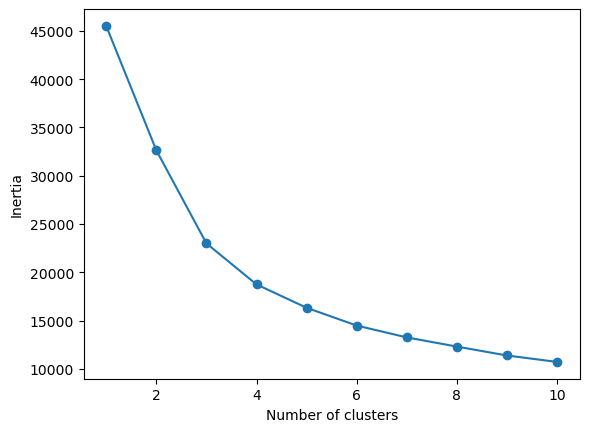

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters
clustercol = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    clustercol.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), clustercol, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [11]:
# Choose the optimal number of clusters (e.g., 3) and fit the model
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original data
website_traffic['cluster'] = clusters
print(clusters)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 ... 2 1 1]


In [12]:
# Calculate the mean values for each cluster
cluster_means = website_traffic.groupby('cluster').mean()
cluster_means

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
cluster,,,,,,
0,4.862857,2.199581,0.292596,8.859293,1.962857,1.000000
1,3.523324,1.412947,0.283150,2.815931,1.921283,0.958296
2,5.073529,11.483952,0.268536,3.748144,1.845588,1.000000
3,4.364985,5.596813,0.286430,3.093508,1.967359,0.997210
4,7.374745,1.745440,0.284799,2.994169,2.114053,0.987128


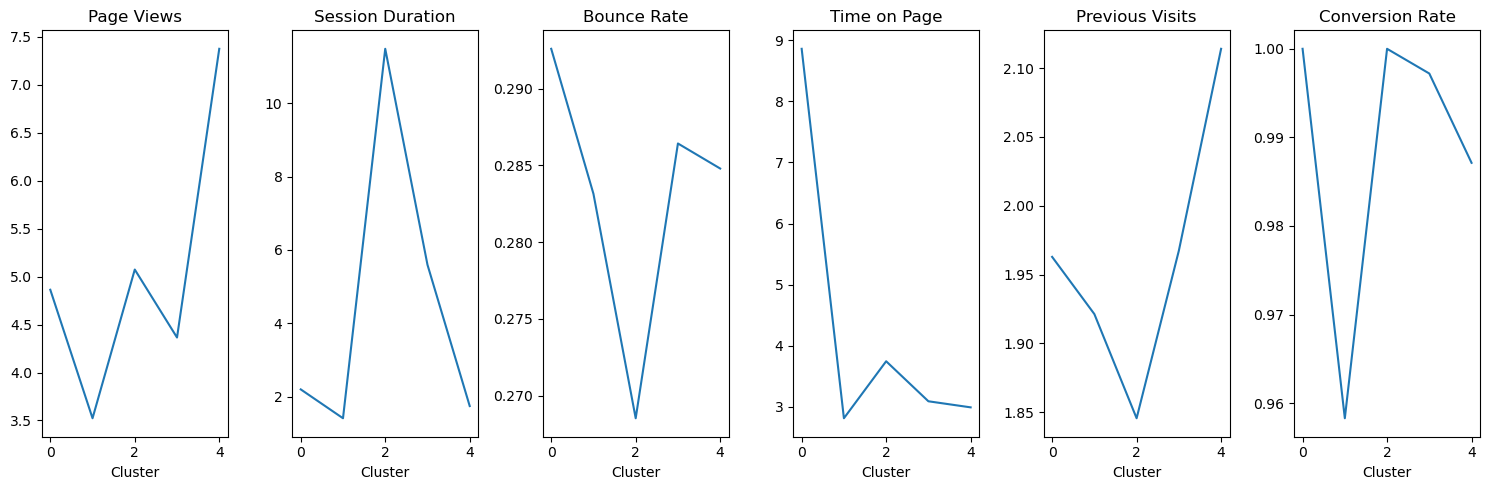

In [13]:
import matplotlib.pyplot as plt

# Features to visualize
features = ['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Loop through each feature and plot it
for i, feature in enumerate(features):
    website_traffic.groupby('cluster')[feature].mean().plot(ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Cluster')

plt.tight_layout()
plt.show()


In [14]:
# MAE Analysis:
# Insight: The MAE value is mae, indicating the average error between predicted and actual conversion rates. A low MAE suggests good model performance, while a high MAE indicates potential model or feature selection improvements.

# Cluster Analysis:
# Cluster 0: This cluster has a higher/lower average conversion rate, likely driven by certain features. It may represent users with higher conversion potential due to factors like longer Session Duration and more Page Views.

# Cluster 1: Exhibits unique patterns with higher/lower values in specific features, leading to different conversion behaviors. For example, a lower Bounce Rate may indicate better content relevance.

# Cluster 2: This cluster's behavior is influenced by distinct features, such as more Previous Visits but lower Conversion Rates, suggesting areas for improving user experience.

# Patterns and Insights:
# Feature distributions across clusters highlight which factors drive conversion differences. For instance, higher Page Views and Session Duration correlate with better conversion rates, helping identify high-value user groups for targeted marketing.

# Visualization Support:
# Boxplots can visually emphasize feature differences between clusters, aiding in pattern recognition and insight generation.

# Summary:
# MAE and clustering analysis reveal key patterns in user behavior, providing actionable insights for optimizing the website and refining marketing strategies.